# Setup and data cleaning

## Notebook setup

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.executable

'/Users/fanghema/Desktop/aaSTAT_5200/STAT_5200_final_project/env/bin/python'

## Data Preprocessing

I then load in the data from replication dataset.

In [2]:
data_galvao_et_al = pd.read_csv('../gmo-files/datareturns.txt', sep="\t", header=None)
data_galvao_et_al

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.67,0.00,-0.31,0.01,0.15,0.012,0.33,-0.45,-0.14,-0.20,...,-1.28,-0.91,-0.86,-0.33,-0.25,-0.23,-1.35,-0.52,-0.24,-0.07
1,0.79,-0.26,0.26,-0.08,-0.19,0.012,0.86,0.65,-0.03,0.29,...,0.34,1.15,0.29,0.43,0.72,0.59,0.71,0.37,0.27,-0.26
2,0.63,-0.17,-0.09,0.19,-0.33,0.012,0.96,0.55,0.83,1.29,...,1.14,0.60,1.13,0.80,0.96,0.35,0.99,0.41,0.49,0.07
3,0.40,0.08,-0.28,0.07,-0.33,0.012,-0.01,0.09,0.32,0.35,...,1.38,-0.26,0.61,0.07,-0.16,0.17,1.11,0.03,0.71,0.83
4,-0.63,0.04,-0.16,-0.31,0.14,0.012,-0.15,-0.28,0.26,-0.37,...,0.18,-1.27,-0.71,-0.03,-0.42,-0.39,-0.79,-1.08,-0.03,-0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12960,0.07,0.32,-0.18,-0.24,-0.08,0.000,-1.30,-0.04,-0.04,-0.10,...,-0.34,0.53,0.01,-0.31,-0.02,0.01,-0.03,0.14,-0.08,-0.20
12961,0.39,0.32,-0.24,-0.20,-0.18,0.000,0.23,0.24,-0.06,-0.03,...,0.02,0.21,0.20,0.39,0.67,0.00,0.01,0.46,-0.12,-0.01
12962,0.13,0.22,0.61,0.10,0.17,0.000,0.02,-0.22,-0.21,-0.38,...,0.53,0.29,0.21,0.53,0.59,0.44,0.17,0.42,0.11,0.26
12963,-0.48,0.06,0.23,0.11,0.25,0.000,-0.12,-0.56,-0.39,-0.82,...,-0.30,-0.10,-0.27,-0.14,-0.68,-0.15,0.16,-0.35,-0.34,-0.23


Comparing this to the 49-industry dataset from Kenneth French's data library.

In [3]:
industry_portfolios = pd.read_csv(
    '../data/raw/49_Industry_Portfolios_Daily.csv', 
    index_col = 0,
    parse_dates=True
)
ff5_factors = pd.read_csv(
    '../data/raw/F-F_Research_Data_5_Factors_2x3_daily.csv', 
    index_col = 0,
    parse_dates=True
)

replication_data = (
    ff5_factors
    .merge(industry_portfolios, left_index=True, right_index=True, how='left')
    .loc["1963-07-01":]
)

replication_data

,Mkt-RF,SMB,HML,RMW,CMA,RF,Agric,Food,Soda,Beer,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1963-07-01,-0.67,0.00,-0.34,-0.01,0.16,0.01,0.33,-0.45,-0.14,-0.20,...,-1.28,-0.91,-0.83,-0.33,-0.25,-0.27,-1.35,-0.51,-0.20,0.14
1963-07-02,0.79,-0.26,0.26,-0.07,-0.20,0.01,0.86,0.65,-0.03,0.29,...,0.34,1.15,0.33,0.43,0.69,0.47,0.71,0.33,0.43,0.13
1963-07-03,0.63,-0.17,-0.09,0.18,-0.34,0.01,0.96,0.55,0.83,1.29,...,1.14,0.60,1.13,0.80,0.96,-0.01,0.99,0.38,0.80,0.09
1963-07-05,0.40,0.08,-0.27,0.09,-0.34,0.01,-0.01,0.09,0.32,0.35,...,1.38,-0.26,0.60,0.07,-0.16,0.14,1.11,0.02,0.64,1.02
1963-07-08,-0.63,0.04,-0.18,-0.29,0.14,0.01,-0.15,-0.28,0.26,-0.37,...,0.18,-1.27,-0.71,-0.03,-0.42,-0.45,-0.79,-1.06,-0.02,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-27,1.17,-0.81,-1.21,-0.23,-1.19,0.02,0.36,0.59,0.30,1.42,...,0.11,1.26,0.31,0.56,0.49,0.52,0.33,-0.64,0.91,-0.72
2025-10-28,0.18,-0.34,-0.61,0.63,-1.01,0.02,-0.91,-1.06,-0.01,-1.60,...,-0.67,-0.72,-0.93,0.31,-1.57,-0.17,-1.20,-1.14,-0.54,-1.40
2025-10-29,-0.09,-0.98,-0.81,0.30,-1.37,0.02,-0.46,-3.01,-2.64,-3.19,...,-4.25,-0.13,-0.52,-0.49,-1.19,-1.04,-1.53,-3.46,-1.34,-1.51
2025-10-30,-1.10,0.00,0.67,-0.27,0.42,0.02,-2.09,-0.15,0.69,0.82,...,-0.47,0.39,1.36,-1.78,-1.99,0.65,-1.42,-0.67,-0.55,0.53


In [4]:
corr_df = pd.DataFrame(
    index = np.arange(data_galvao_et_al.shape[1]),
    columns = replication_data.columns
)

for i in range(data_galvao_et_al.shape[1]):
    for col in replication_data.columns:
        corr = np.corrcoef(
            data_galvao_et_al.iloc[:, i].values,
            replication_data[col][:data_galvao_et_al.shape[0]].values
        )[0, 1]
        corr_df.loc[i, col] = corr

In [5]:
columns_map = {}
for i in corr_df.index:
    argmax = corr_df.loc[i].argmax()
    max = corr_df.loc[i].max()
    print(f"column number {i}: {replication_data.columns[argmax]} ({max})")
    columns_map[i] = replication_data.columns[argmax]

print(f"Number of keys: {len(set(columns_map.keys()))}")
print(f"Number of values: {len(set(columns_map.values()))}")

column number 0: Mkt-RF (0.9999631176102544)
column number 1: SMB (0.9983317073995388)
column number 2: HML (0.9707746741309701)
column number 3: RMW (0.9695277483402874)
column number 4: CMA (0.996411334405961)
column number 5: RF (0.9765065560785002)
column number 6: Agric (0.9993517050995383)
column number 7: Food (0.9998997012505297)
column number 8: Soda (0.9999736609358353)
column number 9: Beer (0.9999633984001192)
column number 10: Smoke (0.9996248704879636)
column number 11: Toys (0.9986361761212148)
column number 12: Fun (0.9996860847221328)
column number 13: Books (0.9981487902396878)
column number 14: Hshld (0.9999021300411858)
column number 15: Clths (0.9979290120722208)
column number 16: MedEq (0.9998955127299733)
column number 17: Drugs (0.9998955062570346)
column number 18: Chems (0.9999833203244106)
column number 19: Rubbr (0.9989401195566953)
column number 20: Txtls (0.9978286804583132)
column number 21: BldMt (0.9925498232310794)
column number 22: Cnstr (0.9955760178

We check for the two columns that were not matched to any columns in Galvao et al's dataset. This indeed matches their description.

In [6]:
for col in replication_data.columns:
    if col not in columns_map.values():
        print(col)

Hlth
Softw


We update column names and indices for the original dataframe. We also drop Healthcare and Software from our extended dataframe. 

In [7]:
replication_data = replication_data.drop(columns=['Hlth', 'Softw'])
data_galvao_et_al.rename(columns = columns_map, inplace=True)
data_galvao_et_al.index = replication_data.index[:data_galvao_et_al.shape[0]]

Data cleaning and replacing invalid values with 0.

In [8]:
replication_data = (
    replication_data
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

data_galvao_et_al = (
    data_galvao_et_al
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

In [9]:
data_galvao_et_al.to_csv('../data/processed/data_galvao.csv')
replication_data.to_csv("../data/processed/data_extended.csv")

## Summary Statistics

In [11]:
replication_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Agric,Food,Soda,Beer,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
count,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,...,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000,15690.000000
mean,0.028841,0.005815,0.014004,0.012736,0.011643,0.017183,0.049493,0.044612,0.053917,0.049760,...,0.045228,0.045016,0.048480,0.052345,0.054479,0.047213,0.047164,0.035504,0.055850,0.030916
std,1.023264,0.551013,0.585571,0.403702,0.382175,0.012740,1.437237,0.905245,1.356966,1.126727,...,1.260816,1.252522,1.088046,1.156068,1.247532,1.417553,1.174384,1.449594,1.427951,1.408428
min,-17.440000,-11.150000,-5.030000,-2.970000,-5.310000,0.000000,-15.270000,-16.080000,-19.220000,-14.730000,...,-21.350000,-17.570000,-13.250000,-17.970000,-15.260000,-16.960000,-15.200000,-17.640000,-16.360000,-17.230000
25%,-0.420000,-0.280000,-0.240000,-0.180000,-0.180000,0.010000,-0.630000,-0.410000,-0.610000,-0.530000,...,-0.610000,-0.600000,-0.480000,-0.520000,-0.577500,-0.540000,-0.490000,-0.600000,-0.500000,-0.590000
50%,0.050000,0.020000,0.010000,0.010000,0.010000,0.020000,0.040000,0.060000,0.050000,0.040000,...,0.050000,0.050000,0.070000,0.070000,0.070000,0.040000,0.060000,0.050000,0.070000,0.050000
75%,0.510000,0.310000,0.260000,0.190000,0.200000,0.020000,0.730000,0.510000,0.690000,0.620000,...,0.700000,0.680000,0.610000,0.620000,0.690000,0.630000,0.600000,0.680000,0.640000,0.680000
max,11.360000,6.080000,6.730000,4.570000,2.480000,0.060000,20.320000,10.010000,11.680000,11.460000,...,10.910000,12.710000,10.640000,11.750000,15.890000,16.940000,17.820000,17.120000,18.180000,16.840000


In [12]:
data_galvao_et_al.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Agric,Food,Soda,Beer,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
count,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,...,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000,12965.000000
mean,0.024251,0.009328,0.017895,0.012640,0.015580,0.019350,0.051073,0.050685,0.056383,0.054464,...,0.048595,0.046272,0.048008,0.050200,0.055287,0.044963,0.046565,0.029755,0.054201,0.029523
std,0.992087,0.520785,0.495309,0.348898,0.360934,0.012195,1.396318,0.879694,1.406782,1.128794,...,1.243543,1.215566,1.059366,1.133851,1.252471,1.382958,1.153460,1.431005,1.414357,1.433517
min,-17.440000,-11.180000,-5.090000,-2.860000,-5.240000,0.000000,-15.270000,-16.040000,-19.220000,-14.730000,...,-21.430000,-17.560000,-13.200000,-18.000000,-15.480000,-16.980000,-13.980000,-15.500000,-16.280000,-17.260000
25%,-0.420000,-0.260000,-0.210000,-0.160000,-0.170000,0.012000,-0.630000,-0.390000,-0.630000,-0.530000,...,-0.600000,-0.590000,-0.470000,-0.520000,-0.590000,-0.520000,-0.490000,-0.600000,-0.480000,-0.610000
50%,0.050000,0.030000,0.010000,0.010000,0.010000,0.019000,0.040000,0.060000,0.050000,0.040000,...,0.050000,0.050000,0.080000,0.060000,0.070000,0.040000,0.060000,0.030000,0.060000,0.050000
75%,0.490000,0.300000,0.240000,0.170000,0.190000,0.025000,0.730000,0.500000,0.720000,0.620000,...,0.680000,0.670000,0.590000,0.600000,0.720000,0.590000,0.580000,0.680000,0.610000,0.700000
max,11.350000,6.090000,4.040000,4.100000,2.490000,0.061000,20.320000,9.980000,11.680000,10.120000,...,10.920000,9.330000,9.750000,11.750000,11.490000,16.960000,17.840000,21.900000,17.940000,16.840000


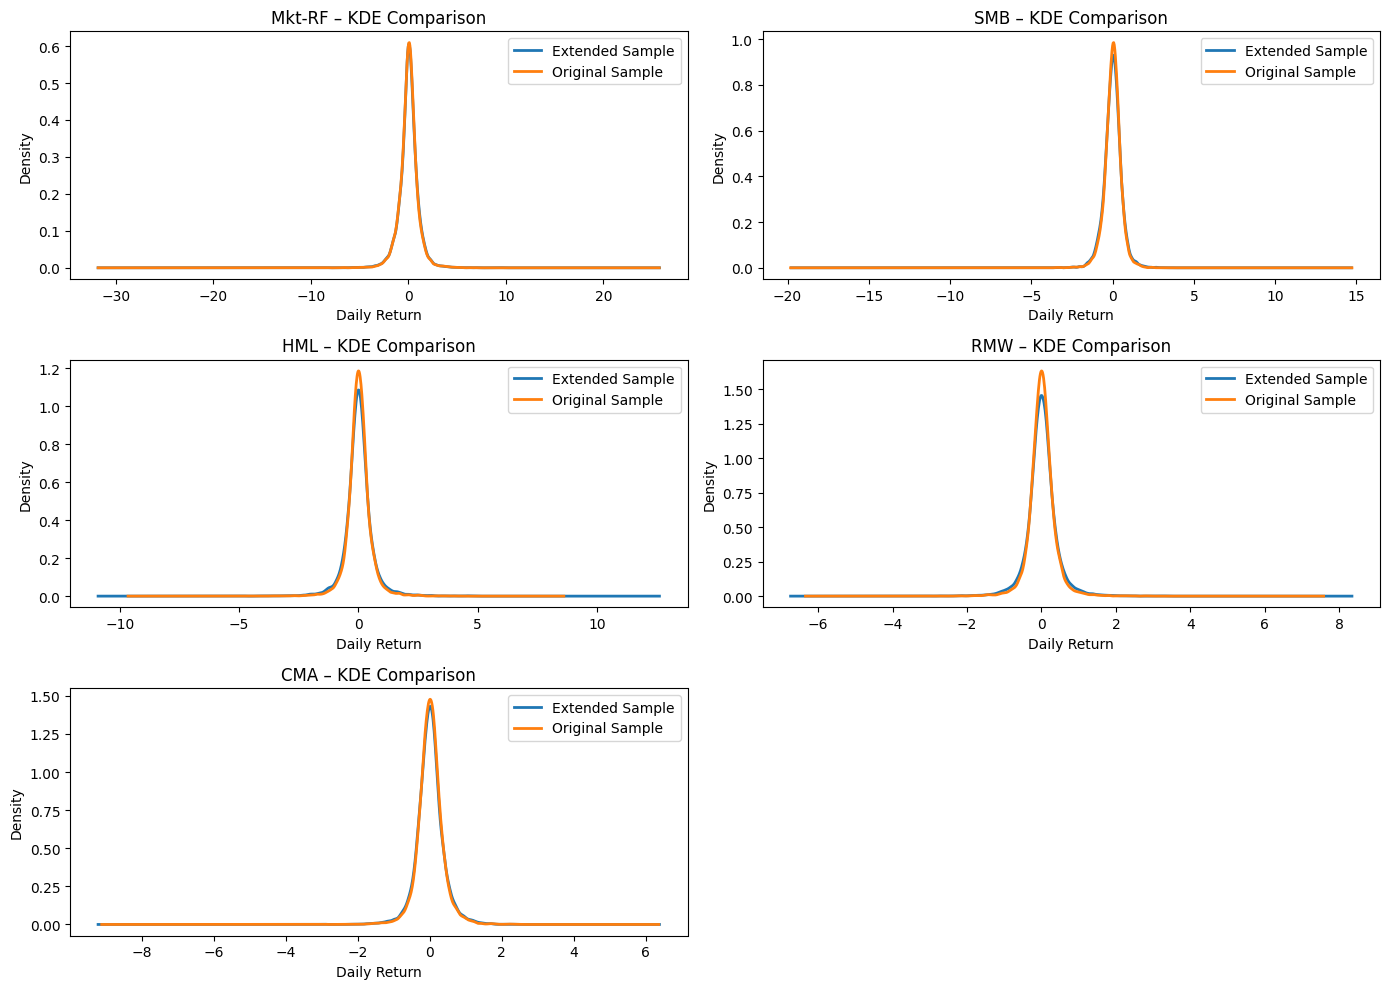

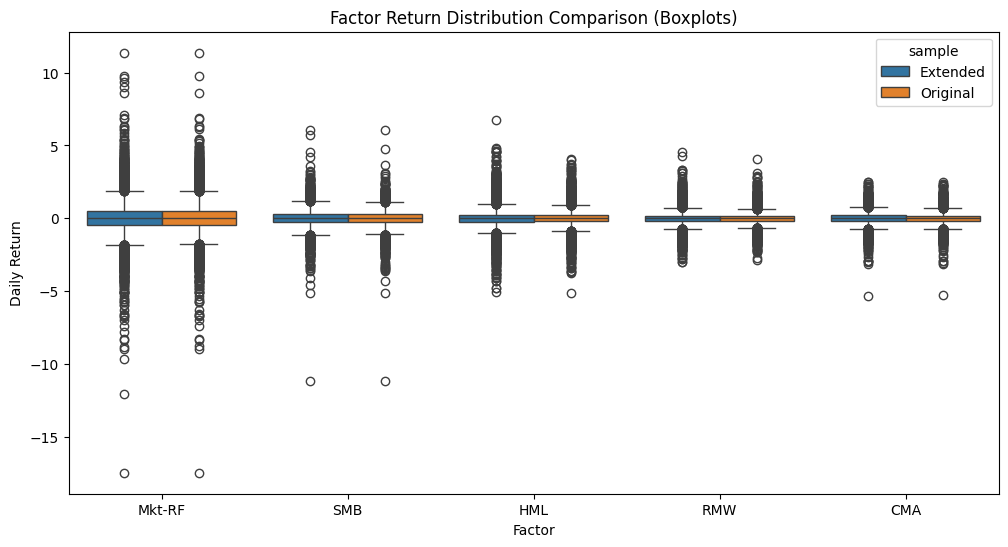

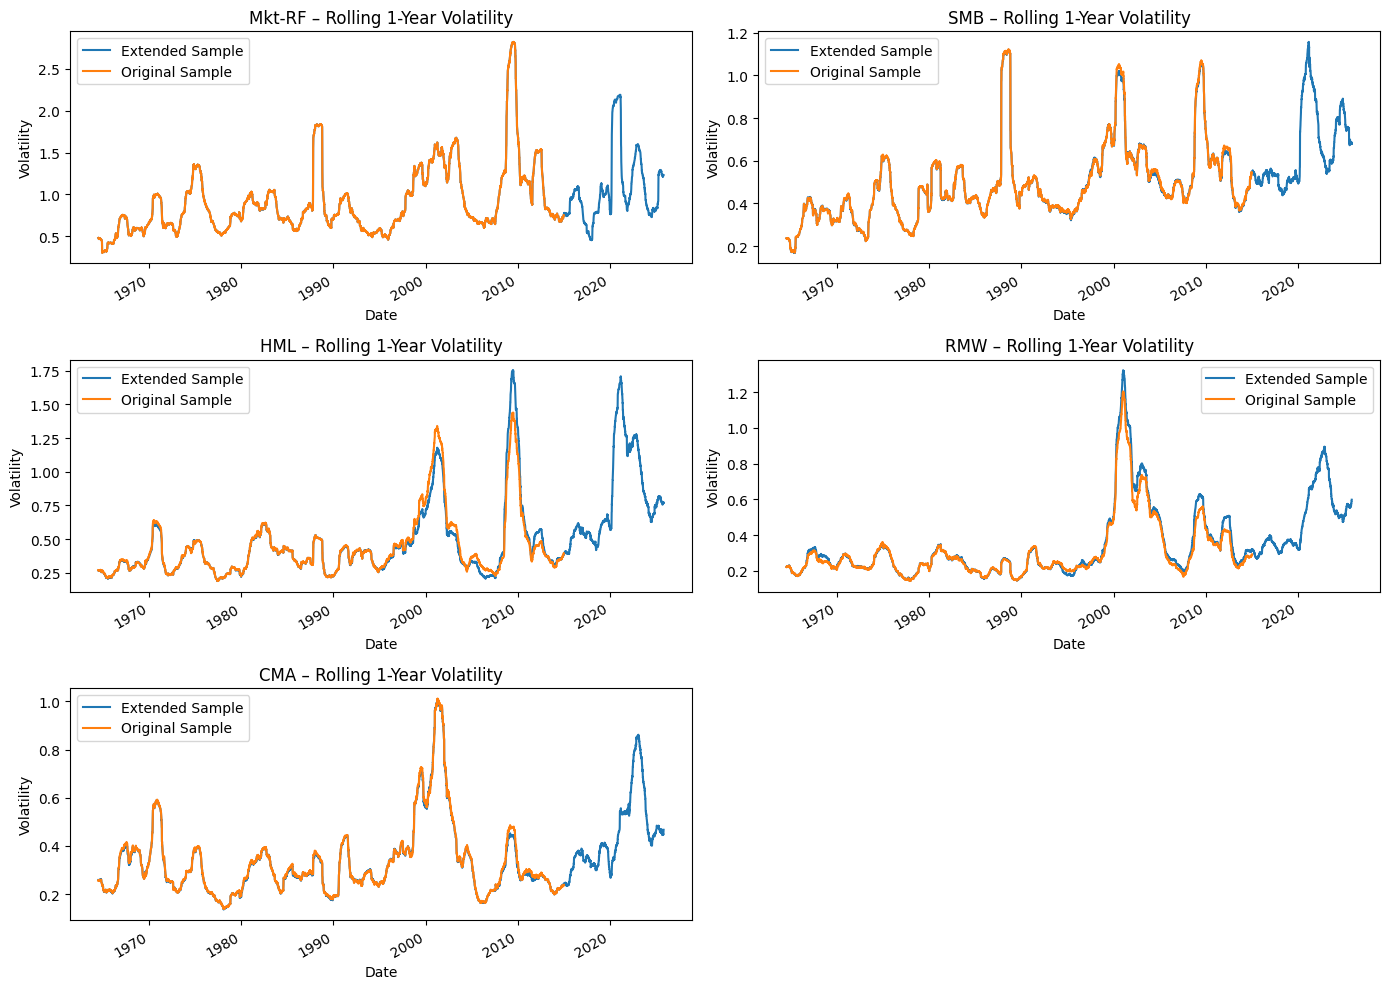

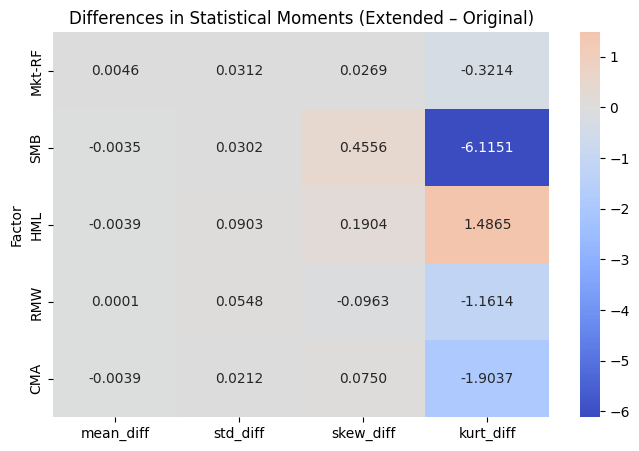

In [15]:
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]

plt.figure(figsize=(14, 10))

for i, fac in enumerate(factors, 1):
    plt.subplot(3, 2, i)
    replication_data[fac].plot(kind="kde", label="Extended Sample", linewidth=2)
    data_galvao_et_al[fac].plot(kind="kde", label="Original Sample", linewidth=2)
    plt.title(f"{fac} – KDE Comparison")
    plt.xlabel("Daily Return")
    plt.legend()

plt.tight_layout()
plt.show()

combined = pd.concat([
    replication_data[factors].assign(sample="Extended"),
    data_galvao_et_al[factors].assign(sample="Original")
])

combined_melted = combined.melt(id_vars="sample")

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_melted, x="variable", y="value", hue="sample")
plt.title("Factor Return Distribution Comparison (Boxplots)")
plt.xlabel("Factor")
plt.ylabel("Daily Return")
plt.show()

plt.figure(figsize=(14, 10))

for i, fac in enumerate(factors, 1):
    plt.subplot(3, 2, i)
    replication_data[fac].rolling(252).std().plot(label="Extended Sample", linewidth=1.5)
    data_galvao_et_al[fac].rolling(252).std().plot(label="Original Sample", linewidth=1.5)
    plt.title(f"{fac} – Rolling 1-Year Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()

plt.tight_layout()
plt.show()


stats = pd.DataFrame({
    "mean_diff": replication_data[factors].mean() - data_galvao_et_al[factors].mean(),
    "std_diff": replication_data[factors].std() - data_galvao_et_al[factors].std(),
    "skew_diff": replication_data[factors].skew() - data_galvao_et_al[factors].skew(),
    "kurt_diff": replication_data[factors].kurt() - data_galvao_et_al[factors].kurt()
})

plt.figure(figsize=(8, 5))
sns.heatmap(stats, annot=True, cmap="coolwarm", center=0, fmt=".4f")
plt.title("Differences in Statistical Moments (Extended – Original)")
plt.ylabel("Factor")
plt.show()

Sampled industries: ['Coal', 'Whlsl', 'Mines', 'Insur', 'Guns', 'Paper']


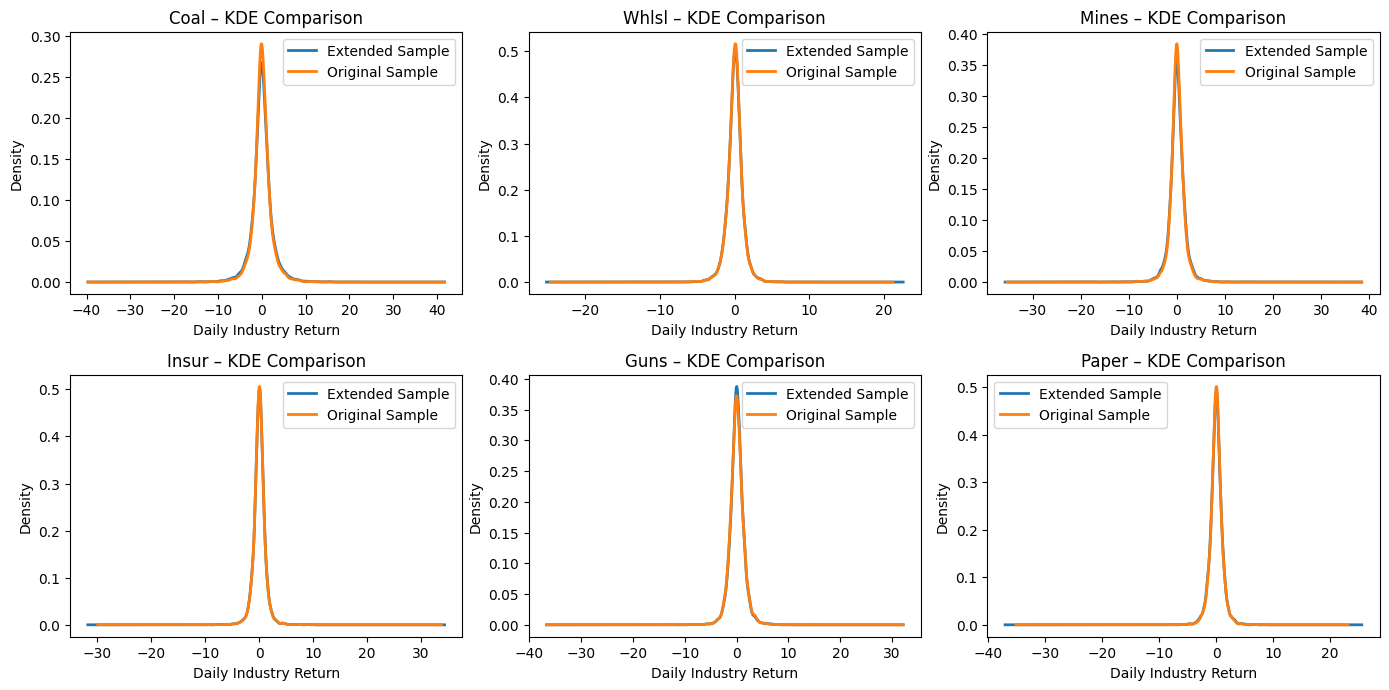

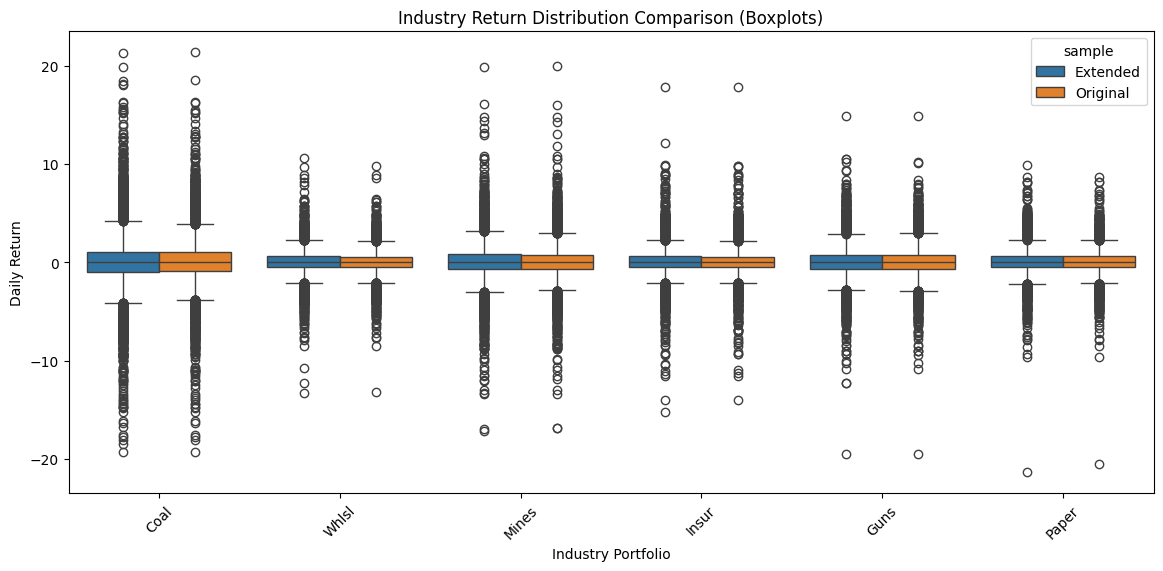

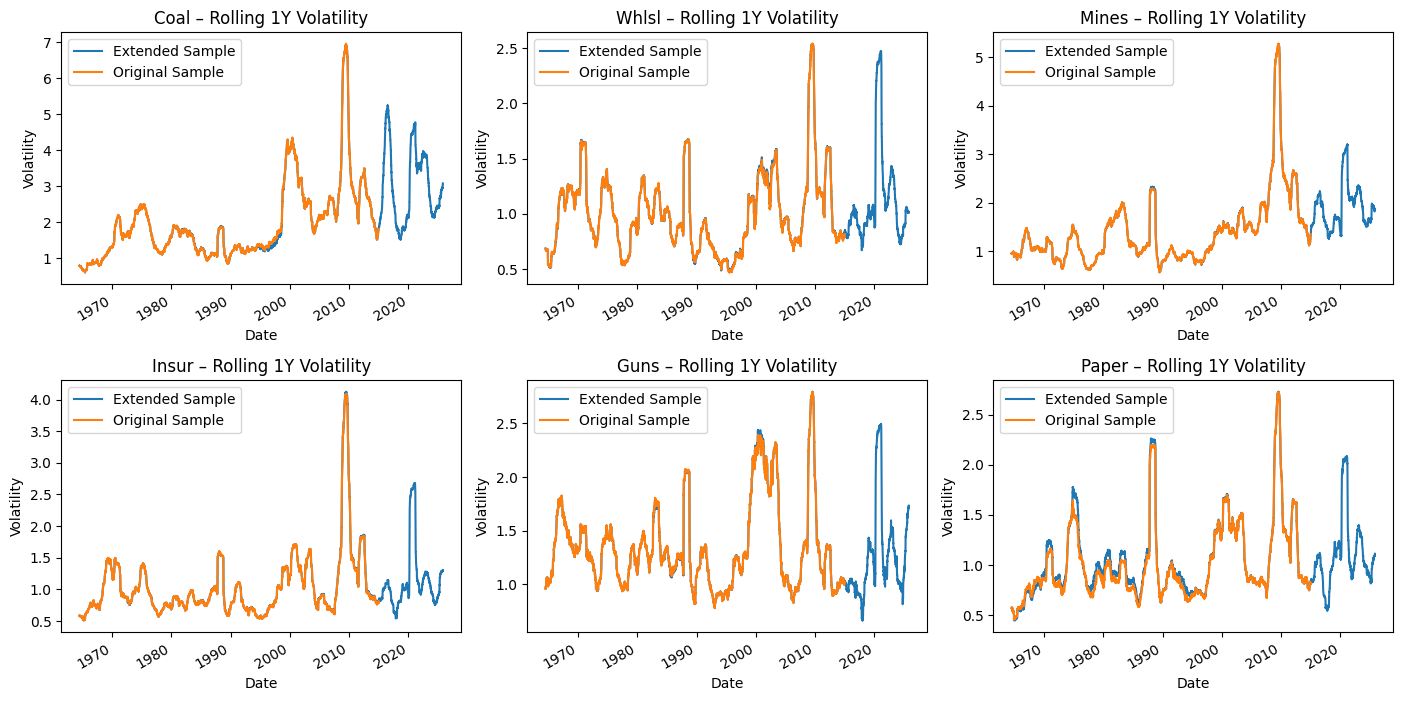

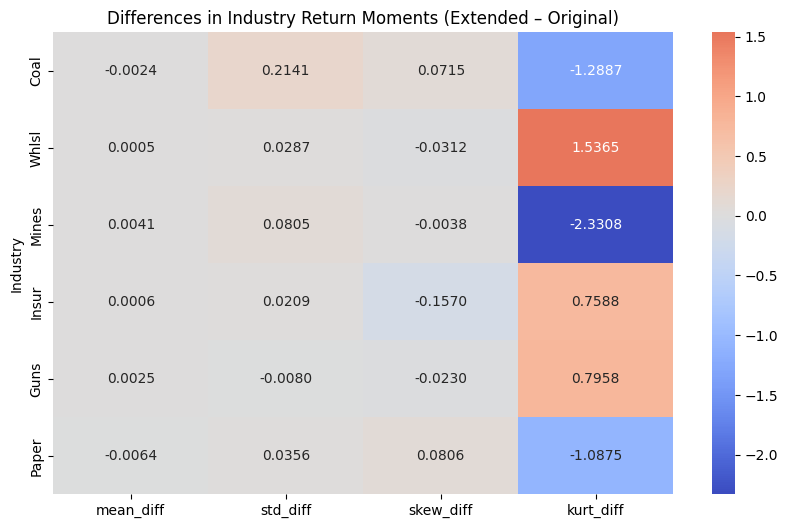

In [16]:
N_SAMPLE_INDUSTRIES = 6  

factor_cols = ["Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]
industry_cols = [col for col in replication_data.columns if col not in factor_cols]

np.random.seed(42)
sampled_industries = np.random.choice(industry_cols, size=N_SAMPLE_INDUSTRIES, replace=False).tolist()

print("Sampled industries:", sampled_industries)

plt.figure(figsize=(14, 10))

for i, ind in enumerate(sampled_industries, 1):
    plt.subplot(3, 3, i)
    replication_data[ind].plot(kind="kde", label="Extended Sample", linewidth=2)
    data_galvao_et_al[ind].plot(kind="kde", label="Original Sample", linewidth=2)
    plt.title(f"{ind} – KDE Comparison")
    plt.xlabel("Daily Industry Return")
    plt.legend()

plt.tight_layout()
plt.show()


combined_ind = pd.concat([
    replication_data[sampled_industries].assign(sample="Extended"),
    data_galvao_et_al[sampled_industries].assign(sample="Original")
])

combined_ind_melted = combined_ind.melt(id_vars="sample")

plt.figure(figsize=(14, 6))
sns.boxplot(data=combined_ind_melted, x="variable", y="value", hue="sample")
plt.title("Industry Return Distribution Comparison (Boxplots)")
plt.xlabel("Industry Portfolio")
plt.ylabel("Daily Return")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 10))

for i, ind in enumerate(sampled_industries, 1):
    plt.subplot(3, 3, i)
    replication_data[ind].rolling(252).std().plot(label="Extended Sample", linewidth=1.5)
    data_galvao_et_al[ind].rolling(252).std().plot(label="Original Sample", linewidth=1.5)
    plt.title(f"{ind} – Rolling 1Y Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()

plt.tight_layout()
plt.show()


stats_ind = pd.DataFrame({
    "mean_diff": replication_data[sampled_industries].mean() - data_galvao_et_al[sampled_industries].mean(),
    "std_diff": replication_data[sampled_industries].std() - data_galvao_et_al[sampled_industries].std(),
    "skew_diff": replication_data[sampled_industries].skew() - data_galvao_et_al[sampled_industries].skew(),
    "kurt_diff": replication_data[sampled_industries].kurt() - data_galvao_et_al[sampled_industries].kurt()
})

plt.figure(figsize=(10, 6))
sns.heatmap(stats_ind, annot=True, cmap="coolwarm", center=0, fmt=".4f")
plt.title("Differences in Industry Return Moments (Extended – Original)")
plt.ylabel("Industry")
plt.show()